In [30]:
import pandas as pd
import ternary
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_context('talk')

from borfr import BO_RFR, fps
import warnings
warnings.filterwarnings("ignore")
from synth_data.plotting_helpers_mixture_frederic import plot_mixture_4d


df = pd.read_csv('data_mat/data_Co_Ce_Nb.csv')
els = df.columns[2:5]
df.columns

Index(['Unnamed: 0', 'index', 'Co', 'Ce', 'Nb', 'Max', 'labels'], dtype='object')

(array([10.55621462, 21.11242925, 15.83432193, 31.66864387, 10.55621462,
        21.11242925, 15.83432193,  0.        ,  5.27810731, 21.11242925,
         5.27810731, 31.66864387, 15.83432193, 15.83432193,  5.27810731,
        21.11242925, 10.55621462,  0.        , 10.55621462,  0.        ,
        10.55621462, 21.11242925,  5.27810731, 10.55621462,  5.27810731,
         5.27810731,  5.27810731,  0.        ,  0.        , 10.55621462]),
 array([0.04290435, 0.04581914, 0.04873394, 0.05164874, 0.05456354,
        0.05747834, 0.06039313, 0.06330793, 0.06622273, 0.06913753,
        0.07205232, 0.07496712, 0.07788192, 0.08079672, 0.08371152,
        0.08662631, 0.08954111, 0.09245591, 0.09537071, 0.0982855 ,
        0.1012003 , 0.1041151 , 0.1070299 , 0.1099447 , 0.11285949,
        0.11577429, 0.11868909, 0.12160389, 0.12451868, 0.12743348,
        0.13034828]),
 <BarContainer object of 30 artists>)

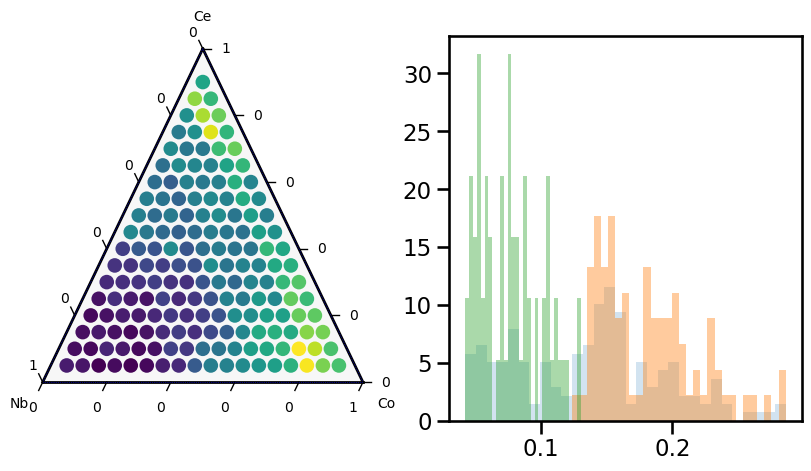

In [32]:
fig,(ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
fontsize=10
tax = ternary.TernaryAxesSubplot(ax=ax1, scale=1)
tax.scatter(df[els].values, c=df['Max'].values,vmin=df['Max'].values.min(),vmax=df['Max'].values.max())
tax.ticks(axis='lbr', multiple=0.2, linewidth=1, offset=0.025)
tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()
tax.boundary(linewidth=2.0)
tax.gridlines(color="blue", multiple=5)
tax.right_corner_label(els[0], fontsize=fontsize)
tax.top_corner_label(els[1], fontsize=fontsize)
tax.left_corner_label(els[2], fontsize=fontsize)
ax2.hist(df['Max'],bins=30, density = True, alpha=0.2)
ax2.hist(df['Max'].values[df['labels'].values==0],bins=30, density = True, alpha=0.4)
ax2.hist(df['Max'].values[df['labels'].values==1],bins=30, density = True, alpha=0.4)

In [33]:
df.values.shape

(171, 7)

In [34]:
def f(x):
    ind = np.argmin(np.linalg.norm(grid-x, axis=1))
    return vals[ind]

def get_label(x):
    ind = np.argmin(np.linalg.norm(grid-x, axis=1))
    return ref_labels[ind]


grid = df[els].values
vals = df['Max'].values
ref_labels = df['labels'].values

In [99]:
np.random.seed(5)

X_init = fps(grid,10)
X_init = grid[np.random.randint(0,171,4)]
y_init = np.array([f(xi) for xi in X_init])

x_test = grid

regm = 'PORFC'
clm = 'RFC'


n_iter = 20
nb = 1
n_iter_b = int(n_iter/nb)

bor = BO_RFR(X_init, y_init, grid, f, x_test, 
             acq='BO',gl = get_label, cl_weight=.1, 
             est_labels='known', N_batch=nb, 
             class_method = clm, reg_method = regm)

bor.run(n_iter_b)

rand_scores = []
for i in range(50):
    rand = BO_RFR(X_init, y_init, grid, f, x_test, 
                  acq='random',gl = get_label,  
                  est_labels='known', N_batch=1,
                  class_method = clm, reg_method = regm)
    
    rand.run(n_iter)
    rand_scores.append(rand.scores)


sf = BO_RFR(X_init, y_init, grid, f, x_test, 
            acq='SF',gl = get_label, 
            est_labels='known', N_batch=1,
            class_method = clm, reg_method = regm)

sf.run(n_iter)

generating test data


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 103645.37it/s]

running iterative exploration:



100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:05<00:00,  3.94it/s]


generating test data


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 102198.06it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.53it/s]


generating test data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 95540.96it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.57it/s]


generating test data


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 101131.70it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.14it/s]


generating test data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 81364.26it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.57it/s]


generating test data


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 104521.42it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:05<00:00,  3.95it/s]


generating test data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 92093.73it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.38it/s]


generating test data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 74711.04it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.25it/s]


generating test data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 94820.99it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:05<00:00,  3.93it/s]


generating test data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 90753.64it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.32it/s]


generating test data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 82534.64it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.34it/s]


generating test data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 81170.89it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.16it/s]


generating test data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 80532.90it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.52it/s]


generating test data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 89418.52it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.42it/s]


generating test data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 80732.33it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.48it/s]


generating test data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 74945.24it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.54it/s]


generating test data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 81865.77it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.60it/s]


generating test data


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 110529.51it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.61it/s]


generating test data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 89251.62it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.64it/s]


generating test data


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 100339.39it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.60it/s]


generating test data


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 114903.23it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.63it/s]


generating test data


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 112718.21it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.62it/s]


generating test data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 97462.42it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.59it/s]


generating test data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 83602.52it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.47it/s]


generating test data


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 105304.06it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.42it/s]


generating test data


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 107096.61it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.58it/s]


generating test data


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 104111.77it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.48it/s]


generating test data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 94185.95it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.11it/s]


generating test data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 99850.48it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:05<00:00,  3.81it/s]


generating test data


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 100889.86it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.33it/s]


generating test data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 74641.06it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.47it/s]


generating test data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 96388.39it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.60it/s]


generating test data


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 101245.90it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.60it/s]


generating test data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 98968.67it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.58it/s]


generating test data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 97040.45it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.62it/s]


generating test data


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 109835.53it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.59it/s]


generating test data


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 105723.17it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.62it/s]


generating test data


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 102739.72it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.65it/s]


generating test data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 92259.58it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.64it/s]


generating test data


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 105489.92it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.53it/s]


generating test data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 85181.23it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.57it/s]


generating test data


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 105489.92it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.68it/s]


generating test data


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 115420.98it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.67it/s]


generating test data


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 101389.03it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.68it/s]


generating test data


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 104888.27it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.68it/s]


generating test data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 97343.37it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.68it/s]


generating test data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 96091.37it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.68it/s]


generating test data


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 104051.35it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.27it/s]


generating test data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 82326.21it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.70it/s]


generating test data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 91952.05it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.66it/s]


generating test data


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 109249.96it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.68it/s]


generating test data


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 171/171 [00:00<00:00, 112241.94it/s]


running iterative exploration:


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.66it/s]


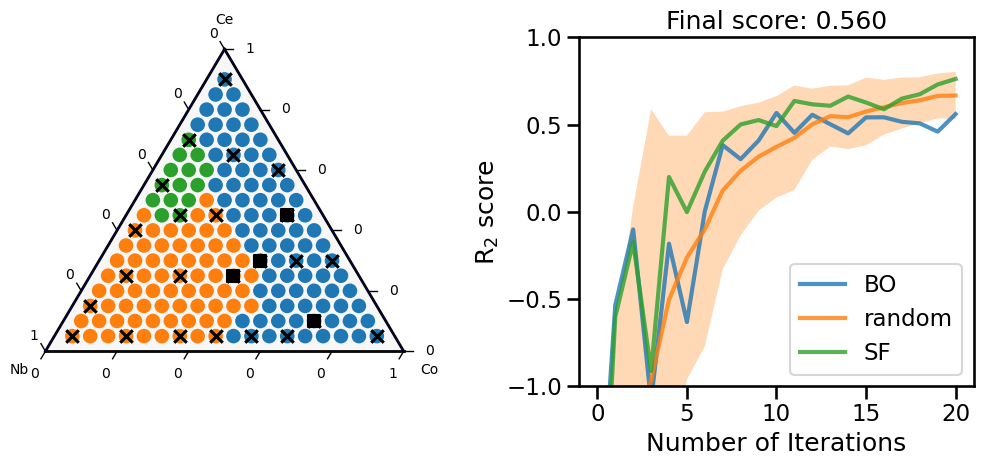

In [100]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(10,5))
fontsize=10
tax = ternary.TernaryAxesSubplot(ax=ax1, scale=1)
tax.scatter(grid, c=bor.classifier.predict(grid),cmap='tab10',vmin=0,vmax=10)
tax.ticks(axis='lbr', multiple=.2, linewidth=1, offset=0.025)
tax.get_axes().axis('off')
tax.clear_matplotlib_ticks()
tax.boundary(linewidth=2.0)
tax.gridlines(color="blue", multiple=5)
tax.right_corner_label(els[0], fontsize=fontsize)
tax.top_corner_label(els[1], fontsize=fontsize)
tax.left_corner_label(els[2], fontsize=fontsize)
tax.scatter(bor.X, c='k', marker='x')

#tax.scatter(rand.X, c='k', marker='*')
#tax.scatter(sf.X, c='k', marker='p', ec='k',fc=None)

tax.scatter(X_init, c='k', marker='s')

ax2.plot(np.arange(bor.n_iters+1)*nb,bor.scores,lw=3,alpha=0.8, label='BO')


#ax2.plot(np.arange(rand.n_iters+1),rand.scores,lw=3,alpha=0.8, label='random')
ax2.plot(np.arange(rand.n_iters+1),np.mean(rand_scores,axis=0),lw=3,alpha=0.8, label='random')
ax2.fill_between(np.arange(rand.n_iters+1),np.mean(rand_scores,axis=0)-np.std(rand_scores,axis=0),
                 np.mean(rand_scores,axis=0)+np.std(rand_scores,axis=0), alpha=0.3, fc='C1')



ax2.plot(np.arange(sf.n_iters+1),sf.scores,lw=3,alpha=0.8, label='SF')
ax2.set_title('Final score: %.3f'%bor.scores[-1])
ax2.set_xlabel('Number of Iterations')
ax2.set_ylabel('R$_2$ score')
ax2.set_ylim(-1,1)
ax2.legend()
plt.tight_layout()

In [94]:
X_init

array([[0.80000001, 0.1       , 0.1       ],
       [0.1       , 0.64999998, 0.25      ],
       [0.75      , 0.2       , 0.05      ],
       [0.75      , 0.2       , 0.05      ]])